Linear Regression 

House price prediction using own dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

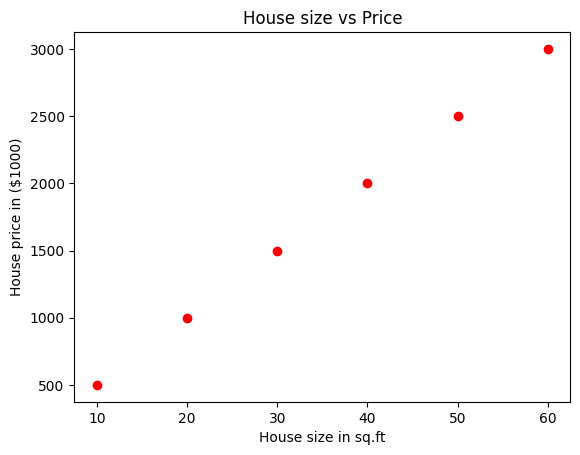

In [2]:
house_size=np.array([10,20,30,40,50,60]).reshape(-1,1)
house_price=np.array([500,1000,1500,2000,2500,3000])
plt.scatter(house_size,house_price, color="red")
plt.title("House size vs Price")
plt.ylabel("House price in ($1000)")
plt.xlabel("House size in sq.ft")
plt.show()

In [3]:
model=LinearRegression()
model.fit(house_size,house_price)
predicted_price=model.predict(house_size)
print(predicted_price)

[ 500. 1000. 1500. 2000. 2500. 3000.]


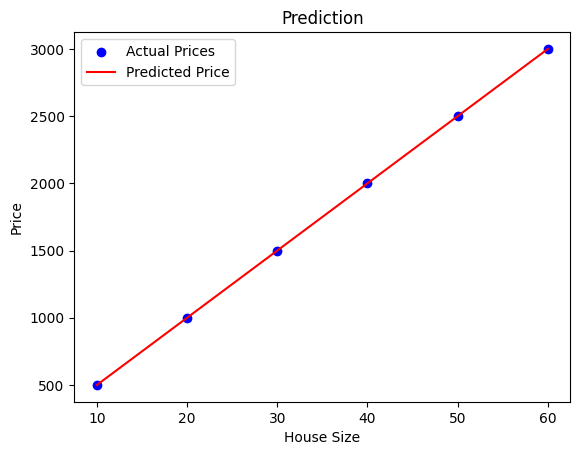

In [7]:
plt.scatter(house_size,house_price,color="blue",label="Actual Prices")
plt.plot(house_size,predicted_price,color="red",label="Predicted Price")
plt.title("Prediction")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.legend()
plt.show()